In [1]:
# Import pandas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read in CSV from https://www.basketball-reference.com/leagues/NBA_2021_per_game.html
df = pd.read_csv("basketballref2020.csv")

In [3]:
# Print the first 5 rows
print(df.head())

  Rk                       Player Pos   Age   Tm     G    GS    MP   FG   FGA  \
0  1   Precious Achiuwa\achiupr01  PF  21.0  MIA  61.0   4.0  12.1  2.0   3.7   
1  2       Jaylen Adams\adamsja01  PG  24.0  MIL   7.0   0.0   2.6  0.1   1.1   
2  3       Steven Adams\adamsst01   C  27.0  NOP  58.0  58.0  27.7  3.3   5.3   
3  4        Bam Adebayo\adebaba01   C  23.0  MIA  64.0  64.0  33.5  7.1  12.5   
4  5  LaMarcus Aldridge\aldrila01   C  35.0  TOT  26.0  23.0  25.9  5.4  11.4   

   ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0  ...  0.509  1.2  2.2  3.4  0.5  0.3  0.5  0.7  1.5   5.0  
1  ...    NaN  0.0  0.4  0.4  0.3  0.0  0.0  0.0  0.1   0.3  
2  ...  0.444  3.7  5.2  8.9  1.9  0.9  0.7  1.3  1.9   7.6  
3  ...  0.799  2.2  6.7  9.0  5.4  1.2  1.0  2.6  2.3  18.7  
4  ...  0.872  0.7  3.8  4.5  1.9  0.4  1.1  1.0  1.8  13.5  

[5 rows x 30 columns]


In [4]:
# Get the summary
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 706 entries, 0 to 705
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Rk      706 non-null    object 
 1   Player  705 non-null    object 
 2   Pos     705 non-null    object 
 3   Age     705 non-null    float64
 4   Tm      705 non-null    object 
 5   G       705 non-null    float64
 6   GS      705 non-null    float64
 7   MP      705 non-null    float64
 8   FG      705 non-null    float64
 9   FGA     705 non-null    float64
 10  FG%     703 non-null    float64
 11  3P      705 non-null    float64
 12  3PA     705 non-null    float64
 13  3P%     670 non-null    float64
 14  2P      705 non-null    float64
 15  2PA     705 non-null    float64
 16  2P%     699 non-null    float64
 17  eFG%    703 non-null    float64
 18  FT      705 non-null    float64
 19  FTA     705 non-null    float64
 20  FT%     676 non-null    float64
 21  ORB     705 non-null    float64
 22  DR

In [5]:
# Print just the player column
print(df["Player"])
# This will require some cleaning

0       Precious Achiuwa\achiupr01
1           Jaylen Adams\adamsja01
2           Steven Adams\adamsst01
3            Bam Adebayo\adebaba01
4      LaMarcus Aldridge\aldrila01
                  ...             
701       Thaddeus Young\youngth01
702           Trae Young\youngtr01
703          Cody Zeller\zelleco01
704          Ivica Zubac\zubaciv01
705                            NaN
Name: Player, Length: 706, dtype: object


In [6]:
#We previously only had 2 of the defensive columns (BLK and STL) accesable to us. I'm going to 
#https://www.basketball-reference.com/leagues/NBA_2021_advanced.html and creating a new CSV using code analogous
#to that which Eli used to create the table df above, as having this data frame will give us access to 4 more defensive
#stats to base our linear model on.

In [7]:
# Read in CSV from https://www.basketball-reference.com/leagues/NBA_2021_per_game.html
df2 = pd.read_csv("bballadvanced.csv")

In [8]:
df2

Rk                       Player  STL%  BLK%  DWS  DBPM
0      1   Precious Achiuwa\achiupr01   1.3   4.0  1.0  -0.5
1      2       Jaylen Adams\adamsja01   0.0   0.0  0.0  -4.6
2      3       Steven Adams\adamsst01   1.6   2.2  1.7   0.1
3      4        Bam Adebayo\adebaba01   1.7   3.2  3.2   2.0
4      5  LaMarcus Aldridge\aldrila01   0.8   3.7  0.6  -0.2
..   ...                          ...   ...   ...  ...   ...
700  536       Delon Wright\wrighde01   3.0   1.3  0.5   0.6
701  537     Thaddeus Young\youngth01   2.2   2.1  2.2   1.4
702  538         Trae Young\youngtr01   1.2   0.5  1.3  -1.7
703  539        Cody Zeller\zelleco01   1.3   1.7  1.1  -0.2
704  540        Ivica Zubac\zubaciv01   0.7   3.4  2.1   0.4

[705 rows x 6 columns]

In [9]:
#We see here that df and fd2 are in the same order as far as which player goes where.

In [10]:
df

Rk  \
0                                                    1   
1                                                    2   
2                                                    3   
3                                                    4   
4                                                    5   
..                                                 ...   
701                                                537   
702                                                538   
703                                                539   
704                                                540   
705  Provided by <a href="https://www.sports-refere...   

                          Player  Pos   Age   Tm     G    GS    MP   FG   FGA  \
0     Precious Achiuwa\achiupr01   PF  21.0  MIA  61.0   4.0  12.1  2.0   3.7   
1         Jaylen Adams\adamsja01   PG  24.0  MIL   7.0   0.0   2.6  0.1   1.1   
2         Steven Adams\adamsst01    C  27.0  NOP  58.0  58.0  27.7  3.3   5.3   
3          Bam Adebayo\adebaba01    C  23.0  MIA  64.0  64.0  33.5  7.1  12.5   
4    LaMarcus Aldridge\aldrila01    C  35.0  TOT  26.0  23.0  25.9  5.4  11.4   
..                           ...  ...   ...  ...   ...   ...   ...  ...   ...   
701     Thaddeus Young\youngth01   PF  32.0  CHI  68.0  23.0  24.3  5.4   9.7   
702         Trae Young\youngtr01   PG  22.0  ATL  63.0  63.0  33.7  7.7  17.7   
703        Cody Zeller\zelleco01    C  28.0  CHO  48.0  21.0  20.9  3.8   6.8   
704        Ivica Zubac\zubaciv01    C  23.0  LAC  72.0  33.0  22.3  3.6   5.5   
705                          NaN  NaN   NaN  NaN   NaN   NaN   NaN  NaN   NaN   

     ...    FT%  ORB  DRB  TRB  AST  STL  BLK  TOV   PF   PTS  
0    ...  0.509  1.2  2.2  3.4  0.5  0.3  0.5  0.7  1.5   5.0  
1    ...    NaN  0.0  0.4  0.4  0.3  0.0  0.0  0.0  0.1   0.3  
2    ...  0.444  3.7  5.2  8.9  1.9  0.9  0.7  1.3  1.9   7.6  
3    ...  0.799  2.2  6.7  9.0  5.4  1.2  1.0  2.6  2.3  18.7  
4    ...  0.872  0.7  3.8  4.5  1.9  0.4  1.1  1.0  1.8  13.5  
..   ...    ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  
701  ...  0.628  2.5  3.8  6.2  4.3  1.1  0.6  2.0  2.2  12.1  
702  ...  0.886  0.6  3.3  3.9  9.4  0.8  0.2  4.1  1.8  25.3  
703  ...  0.714  2.5  4.4  6.8  1.8  0.6  0.4  1.1  2.5   9.4  
704  ...  0.789  2.6  4.6  7.2  1.3  0.3  0.9  1.1  2.6   9.0  
705  ...    NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN   NaN  

[706 rows x 30 columns]

In [11]:
df2

Rk                       Player  STL%  BLK%  DWS  DBPM
0      1   Precious Achiuwa\achiupr01   1.3   4.0  1.0  -0.5
1      2       Jaylen Adams\adamsja01   0.0   0.0  0.0  -4.6
2      3       Steven Adams\adamsst01   1.6   2.2  1.7   0.1
3      4        Bam Adebayo\adebaba01   1.7   3.2  3.2   2.0
4      5  LaMarcus Aldridge\aldrila01   0.8   3.7  0.6  -0.2
..   ...                          ...   ...   ...  ...   ...
700  536       Delon Wright\wrighde01   3.0   1.3  0.5   0.6
701  537     Thaddeus Young\youngth01   2.2   2.1  2.2   1.4
702  538         Trae Young\youngtr01   1.2   0.5  1.3  -1.7
703  539        Cody Zeller\zelleco01   1.3   1.7  1.1  -0.2
704  540        Ivica Zubac\zubaciv01   0.7   3.4  2.1   0.4

[705 rows x 6 columns]

In [12]:
#Drop the last row of df and then index through df2 and assign the new vars to df (as opposed to merging which I initially
#tried)

In [13]:
df=df.drop(705)

In [14]:
df["STL%"]=df2["STL%"]

In [15]:
df["BLK%"]=df2["BLK%"]

In [16]:
df["DWS"]=df2["DWS"]

In [17]:
df["DBPM"]=df2["DBPM"]

In [18]:
df

Rk                       Player Pos   Age   Tm     G    GS    MP   FG  \
0      1   Precious Achiuwa\achiupr01  PF  21.0  MIA  61.0   4.0  12.1  2.0   
1      2       Jaylen Adams\adamsja01  PG  24.0  MIL   7.0   0.0   2.6  0.1   
2      3       Steven Adams\adamsst01   C  27.0  NOP  58.0  58.0  27.7  3.3   
3      4        Bam Adebayo\adebaba01   C  23.0  MIA  64.0  64.0  33.5  7.1   
4      5  LaMarcus Aldridge\aldrila01   C  35.0  TOT  26.0  23.0  25.9  5.4   
..   ...                          ...  ..   ...  ...   ...   ...   ...  ...   
700  536       Delon Wright\wrighde01  PG  28.0  SAC  27.0   8.0  25.8  3.9   
701  537     Thaddeus Young\youngth01  PF  32.0  CHI  68.0  23.0  24.3  5.4   
702  538         Trae Young\youngtr01  PG  22.0  ATL  63.0  63.0  33.7  7.7   
703  539        Cody Zeller\zelleco01   C  28.0  CHO  48.0  21.0  20.9  3.8   
704  540        Ivica Zubac\zubaciv01   C  23.0  LAC  72.0  33.0  22.3  3.6   

      FGA  ...  AST  STL  BLK  TOV   PF   PTS  STL%  BLK%  DWS  DBPM  
0     3.7  ...  0.5  0.3  0.5  0.7  1.5   5.0   1.3   4.0  1.0  -0.5  
1     1.1  ...  0.3  0.0  0.0  0.0  0.1   0.3   0.0   0.0  0.0  -4.6  
2     5.3  ...  1.9  0.9  0.7  1.3  1.9   7.6   1.6   2.2  1.7   0.1  
3    12.5  ...  5.4  1.2  1.0  2.6  2.3  18.7   1.7   3.2  3.2   2.0  
4    11.4  ...  1.9  0.4  1.1  1.0  1.8  13.5   0.8   3.7  0.6  -0.2  
..    ...  ...  ...  ...  ...  ...  ...   ...   ...   ...  ...   ...  
700   8.3  ...  3.6  1.6  0.4  1.3  1.1  10.0   3.0   1.3  0.5   0.6  
701   9.7  ...  4.3  1.1  0.6  2.0  2.2  12.1   2.2   2.1  2.2   1.4  
702  17.7  ...  9.4  0.8  0.2  4.1  1.8  25.3   1.2   0.5  1.3  -1.7  
703   6.8  ...  1.8  0.6  0.4  1.1  2.5   9.4   1.3   1.7  1.1  -0.2  
704   5.5  ...  1.3  0.3  0.9  1.1  2.6   9.0   0.7   3.4  2.1   0.4  

[705 rows x 34 columns]

In [19]:
# Create a new dataframe that is a copy of the old one
dfNew = df

# Create a new column in the new dataframe that is just the player's name (without the 9 character ID code)
dfNew['Name'] = dfNew['Player'].str[:-10]
# See if it worked
print(dfNew.iloc[1:5, :])
# The new name column was successfully created

  Rk                       Player Pos   Age   Tm     G    GS    MP   FG   FGA  \
1  2       Jaylen Adams\adamsja01  PG  24.0  MIL   7.0   0.0   2.6  0.1   1.1   
2  3       Steven Adams\adamsst01   C  27.0  NOP  58.0  58.0  27.7  3.3   5.3   
3  4        Bam Adebayo\adebaba01   C  23.0  MIA  64.0  64.0  33.5  7.1  12.5   
4  5  LaMarcus Aldridge\aldrila01   C  35.0  TOT  26.0  23.0  25.9  5.4  11.4   

   ...  STL  BLK  TOV   PF   PTS  STL%  BLK%  DWS  DBPM               Name  
1  ...  0.0  0.0  0.0  0.1   0.3   0.0   0.0  0.0  -4.6       Jaylen Adams  
2  ...  0.9  0.7  1.3  1.9   7.6   1.6   2.2  1.7   0.1       Steven Adams  
3  ...  1.2  1.0  2.6  2.3  18.7   1.7   3.2  3.2   2.0        Bam Adebayo  
4  ...  0.4  1.1  1.0  1.8  13.5   0.8   3.7  0.6  -0.2  LaMarcus Aldridge  

[4 rows x 35 columns]


In [20]:
# Create a new dataframe that reorders the columns
dfReordered = dfNew[['Rk','Name','Pos','Tm','Age','G','GS','MP','FG', 'FGA','FG%','3P','3PA','3P%',
                     '2P','2P%','eFG%','FT','FTA','FT%','ORB','DRB','TRB','AST','STL','BLK','STL%',
                     'BLK%','DWS','DBPM','TOV','PF','PTS']]
print(dfReordered.head())

  Rk               Name Pos   Tm   Age     G    GS    MP   FG   FGA  ...  AST  \
0  1   Precious Achiuwa  PF  MIA  21.0  61.0   4.0  12.1  2.0   3.7  ...  0.5   
1  2       Jaylen Adams  PG  MIL  24.0   7.0   0.0   2.6  0.1   1.1  ...  0.3   
2  3       Steven Adams   C  NOP  27.0  58.0  58.0  27.7  3.3   5.3  ...  1.9   
3  4        Bam Adebayo   C  MIA  23.0  64.0  64.0  33.5  7.1  12.5  ...  5.4   
4  5  LaMarcus Aldridge   C  TOT  35.0  26.0  23.0  25.9  5.4  11.4  ...  1.9   

   STL  BLK  STL%  BLK%  DWS  DBPM  TOV   PF   PTS  
0  0.3  0.5   1.3   4.0  1.0  -0.5  0.7  1.5   5.0  
1  0.0  0.0   0.0   0.0  0.0  -4.6  0.0  0.1   0.3  
2  0.9  0.7   1.6   2.2  1.7   0.1  1.3  1.9   7.6  
3  1.2  1.0   1.7   3.2  3.2   2.0  2.6  2.3  18.7  
4  0.4  1.1   0.8   3.7  0.6  -0.2  1.0  1.8  13.5  

[5 rows x 33 columns]


In [21]:
# Make the names lowercase so the data can be merged by this column with the other dataframe that includes OVR score
dfReordered['Name'] = dfReordered['Name'].str.lower()
dfReordered['Name'] 

C:\Users\husto\AppData\Local\Temp/ipykernel_3824/2947717095.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfReordered['Name'] = dfReordered['Name'].str.lower()


0       precious achiuwa
1           jaylen adams
2           steven adams
3            bam adebayo
4      lamarcus aldridge
             ...        
700         delon wright
701       thaddeus young
702           trae young
703          cody zeller
704          ivica zubac
Name: Name, Length: 705, dtype: object

In [22]:
# See a list of the column names
cols = list(dfReordered.columns.values)
print(cols)

['Rk', 'Name', 'Pos', 'Tm', 'Age', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'STL%', 'BLK%', 'DWS', 'DBPM', 'TOV', 'PF', 'PTS']


In [23]:
# See the whole dataframe
dfReordered
# The last column seems to be useless

Rk               Name Pos   Tm   Age     G    GS    MP   FG   FGA  ...  \
0      1   precious achiuwa  PF  MIA  21.0  61.0   4.0  12.1  2.0   3.7  ...   
1      2       jaylen adams  PG  MIL  24.0   7.0   0.0   2.6  0.1   1.1  ...   
2      3       steven adams   C  NOP  27.0  58.0  58.0  27.7  3.3   5.3  ...   
3      4        bam adebayo   C  MIA  23.0  64.0  64.0  33.5  7.1  12.5  ...   
4      5  lamarcus aldridge   C  TOT  35.0  26.0  23.0  25.9  5.4  11.4  ...   
..   ...                ...  ..  ...   ...   ...   ...   ...  ...   ...  ...   
700  536       delon wright  PG  SAC  28.0  27.0   8.0  25.8  3.9   8.3  ...   
701  537     thaddeus young  PF  CHI  32.0  68.0  23.0  24.3  5.4   9.7  ...   
702  538         trae young  PG  ATL  22.0  63.0  63.0  33.7  7.7  17.7  ...   
703  539        cody zeller   C  CHO  28.0  48.0  21.0  20.9  3.8   6.8  ...   
704  540        ivica zubac   C  LAC  23.0  72.0  33.0  22.3  3.6   5.5  ...   

     AST  STL  BLK  STL%  BLK%  DWS  DBPM  TOV   PF   PTS  
0    0.5  0.3  0.5   1.3   4.0  1.0  -0.5  0.7  1.5   5.0  
1    0.3  0.0  0.0   0.0   0.0  0.0  -4.6  0.0  0.1   0.3  
2    1.9  0.9  0.7   1.6   2.2  1.7   0.1  1.3  1.9   7.6  
3    5.4  1.2  1.0   1.7   3.2  3.2   2.0  2.6  2.3  18.7  
4    1.9  0.4  1.1   0.8   3.7  0.6  -0.2  1.0  1.8  13.5  
..   ...  ...  ...   ...   ...  ...   ...  ...  ...   ...  
700  3.6  1.6  0.4   3.0   1.3  0.5   0.6  1.3  1.1  10.0  
701  4.3  1.1  0.6   2.2   2.1  2.2   1.4  2.0  2.2  12.1  
702  9.4  0.8  0.2   1.2   0.5  1.3  -1.7  4.1  1.8  25.3  
703  1.8  0.6  0.4   1.3   1.7  1.1  -0.2  1.1  2.5   9.4  
704  1.3  0.3  0.9   0.7   3.4  2.1   0.4  1.1  2.6   9.0  

[705 rows x 33 columns]

In [24]:
# Drop the last column
#dfReordered.drop(df.tail(1).index,inplace=True)
#dfReordered

In [25]:
############## Read in data from https://hoopshype.com/nba2k/2020-2021/

from bs4 import BeautifulSoup
import csv
import pandas as pd
import re

df = pd.read_csv("basketballref2020.csv")
soup = BeautifulSoup(open("page2.mht"), features="lxml")

with open('readme.txt', 'w') as f:
    f.write(soup.prettify())
    f.close()


In [26]:
# Each table row in this playerrows result object holds one player in our dataset
# It needs some cleaning
playerrows=soup.find_all('tr')
print(playerrows[2])

<tr>
<td class='3D"rank"' data-value='3D""'>1.</td>
<td class='3D"name"' data-value='3D""'>
<a href='3D"https://hoopshype.com/player/giannis-antetokounmp=' o="">
									Giannis Antetokounmpo								</a>
</td>
<td class='3D"value' data-value='3D"97"' hh-salaries-sorted="">
															97													</td>
</tr>


In [27]:
# Use soup.findall with the anonymous functions to isolate the individual parts (OVR score and name)
# Start with OVR Score
overallrows = soup.find_all(lambda tag: tag.name == 'td' and tag.get('class') == ['3D"value' ])
i=0
for ovr in overallrows:
   print(ovr)
   text = ovr.renderContents()
   overallrows[i]=text
   i=i+1
# We now see all the OVR scores isolated in rows, but they have to be cleaned even more 

<td class='3D"value' hh-salaries-sorted="">2020/21</td>
<td class='3D"value' data-value='3D"97"' hh-salaries-sorted="">
															97													</td>
<td class='3D"value' data-value='3D"97"' hh-salaries-sorted="">
															97													</td>
<td class='3D"value' data-value='3D"96"' hh-salaries-sorted="">
															96													</td>
<td class='3D"value' data-value='3D"96"' hh-salaries-sorted="">
															96													</td>
<td class='3D"value' data-value='3D"95"' hh-salaries-sorted="">
															95													</td>
<td class='3D"value' data-value='3D"95"' hh-salaries-sorted="">
															95													</td>
<td class='3D"value' data-value='3D"95"' hh-salaries-sorted="">
															95													</td>
<td class='3D"value' data-value='3D"94"' hh-salaries-sorted="">
															94													</td>
<td class='3D"value' data-value='3D"94"' hh-salaries-sorted="">
															94													</td>
<td class='3D"value' data-value='3D"91"' hh-

In [28]:
# Write a regex to get rid of leading and trailing stuff around the two digits that make up the OVR score
for ovr in overallrows:
    ovr=str(ovr)
    regex=r"[0-9]*[0-9]"
    ovr=re.search(regex,ovr).group(0)
    print(ovr)
# It worked, but the top number is 2020, which will need to be cleaned

2020
97
97
96
96
95
95
95
94
94
91
90
90
90
90
89
89
88
88
88
88
88
88
87
87
87
87
87
87
86
86
86
86
86
86
86
85
85
85
85
85
85
85
85
85
84
84
84
84
84
84
84
84
83
83
83
83
83
83
83
83
83
83
83
82
82
82
82
82
82
82
82
81
81
81
81
81
81
81
81
81
81
81
80
80
80
80
80
80
80
80
80
80
80
80
80
80
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
79
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
78
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
77
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
76
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
75
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
74
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73
73

In [29]:
# Now work on getting the player name
namerows = soup.find_all(lambda tag: tag.name == 'td' and tag.get('class') == ['3D"name"'])
# Need to find a way to get the 'a' tag from the td.
for name in namerows:
    for a in name.find_all('a', href=True):
        try:
            a=str(a)
            regex=r"[a-z]+-[a-z]+"
            regexName = re.search(regex, a).group(0)
            regexName = str(regexName)
            regexName = regexName.replace("-", " ")
            print(regexName)
        except AttributeError:
            a=str(a)
            regex= r"[a-z]+-[a-z]+"
            regexName = re.search(regex, a)
            regexName = str(regexName)
            regexName = regexName.replace("-", " ")
            print(regexName)

lebron james
giannis antetokounmp
kawhi leonard
james harden
stephen curry
kevin durant
anthony davis
luka doncic
damian lillard
joel embiid
paul george
nikola jokic
kyrie irving
karl anthony
klay thompson
jimmy butler
trae young
russell westbrook
pascal siakam
donovan mitchell
chris paul
bradley beal
rudy gobert
kyle lowry
kristaps porzingis
jayson tatum
devin booker
ben simmons
zion williamson
nikola vucevic
khris middleton
kemba walker
demar derozan
brandon ingram
bam adebayo
fred vanvleet
zach lavine
tj warren
john collins
jamal murray
ja morant
domantas sabonis
deaaron fox
andre drummond
tobias harris
shai gilgeous
lamarcus aldridge
jusuf nurkic
jaylen brown
deandre ayton
dangelo russell
cj mccollum
hassan whiteside
danilo gallinari
spencer dinwiddie
malcolm brogdon
jrue holiday
john wall
jaren jackson
gordon hayward
eric bledsoe
caris levert
blake griffin
montrezl harrell
victor oladipo
steven adams
kevin love
jonathan isaac
clint capela
brook lopez
andrew wiggins
demarcus cousin

In [30]:
list_names = []
list_ovr = []

for name in namerows:
    for a in name.find_all('a', href=True):
        try:
            a=str(a)
            regex= r"[a-z]+-[a-z]+"
            urlname = re.search(regex, a).group(0)
            urlname = str(urlname)
            urlname = urlname.replace("-", " ")
            #Add it to the dataframe
            list_names.append({'Name': urlname})

        except AttributeError:
            a=str(a)
            regex= r"[a-z]+-[a-z]+"
            urlname = re.search(regex, a)
            urlname = str(urlname)
            urlname = urlname.replace("-", " ")
            #Add it to the dataframe
            list_names.append({'Name': urlname})
            
for ovr in overallrows:
    ovr=str(ovr)
    #now need to write a regex to get rid of leading and trailing stuff around the two #'s
    regex=r"[0-9]*[0-9]"
    ovr=re.search(regex,ovr).group(0)
    list_ovr.append(ovr)
    
#Drop the first row of OVRs
list_ovr.pop(0)
      
# Make the names list a data frame
df_BOTH = pd.DataFrame(list_names)

# Add the ovr list to the dataframe as a column
df_BOTH['OVR'] = list_ovr

# Fix Giannis' name (it was shortened somehow in the html)
df_BOTH.iloc[1, 0] = "giannis antetokounmpo"


print(len(list_names))
print(len(list_ovr))
df_BOTH


585
585


Name OVR
0             lebron james  97
1    giannis antetokounmpo  97
2            kawhi leonard  96
3             james harden  96
4            stephen curry  95
..                     ...  ..
580          marial shayok  67
581        justin robinson  67
582          robert franks  67
583     antonius cleveland  67
584           kobi simmons  66

[585 rows x 2 columns]

In [31]:
# Now we want to merge our two dataframes by name, so we can add the OVR column and only include the players in both

# Rename them to keep track of them
df1 = dfReordered # 704 rows x 33 columns
df_NAMEandOVR = df_BOTH # 585 rows x 2 columns

# Merge the two with an inner join by Name, preserving the order of the left keys
dfMerged = df_NAMEandOVR.merge(df1, how='inner', on='Name')

dfMerged # 456 rows × 34 columns

# We lost about 130 players when we merged the dataframes, likely due to spelling differences in the names


Name OVR   Rk    Pos   Tm   Age     G    GS    MP    FG  \
0             lebron james  97  252     PG  LAL  36.0  45.0  45.0  33.4   9.4   
1    giannis antetokounmpo  97   12     PF  MIL  26.0  61.0  61.0  33.0  10.3   
2            kawhi leonard  96  293     SF  LAC  29.0  52.0  52.0  34.1   8.9   
3             james harden  96  201  PG-SG  TOT  31.0  44.0  43.0  36.6   7.8   
4             james harden  96  201     SG  HOU  31.0   8.0   8.0  36.3   7.5   
..                     ...  ..  ...    ...  ...   ...   ...   ...   ...   ...   
451           jared harper  67  203     PG  NYK  23.0   8.0   0.0   2.0   0.0   
452       jarrell brantley  67   63     PF  UTA  24.0  28.0   0.0   4.9   0.9   
453           gabe vincent  67  502     PG  MIA  24.0  50.0   7.0  13.1   1.8   
454        justin robinson  67  435     PG  OKC  23.0   9.0   0.0   9.8   0.8   
455          robert franks  67  163     PF  ORL  24.0   7.0   0.0  14.4   1.9   

     ...   AST  STL  BLK  STL%  BLK%  DWS  DBPM  TOV   PF   PTS  
0    ...   7.8  1.1  0.6   1.6   1.5  2.6   2.3  3.7  1.6  25.0  
1    ...   5.9  1.2  1.2   1.7   3.2  3.3   2.8  3.4  2.8  28.1  
2    ...   5.2  1.6  0.4   2.3   1.1  2.4   1.3  2.0  1.6  24.8  
3    ...  10.8  1.2  0.8   1.6   1.8  1.7   1.0  4.0  2.3  24.6  
4    ...  10.4  0.9  0.8   1.1   1.8  0.2  -0.5  4.3  1.8  24.8  
..   ...   ...  ...  ...   ...   ...  ...   ...  ...  ...   ...  
451  ...   0.1  0.0  0.0   0.0   0.0  0.0  -5.5  0.4  0.1   0.4  
452  ...   0.5  0.3  0.1   2.5   1.2  0.2   1.6  0.3  0.6   2.3  
453  ...   1.3  0.4  0.0   1.6   0.3  0.5  -0.9  0.7  1.6   4.8  
454  ...   1.0  0.3  0.0   1.6   0.0  0.0  -1.0  0.2  1.1   2.3  
455  ...   0.7  0.4  0.4   1.4   2.7  0.1  -0.8  0.3  1.1   6.1  

[456 rows x 34 columns]

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Age')

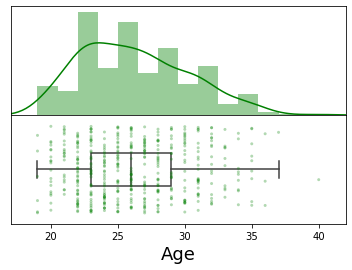

In [32]:
######### Visualization

fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['Age'], 
    ax=axs[0],
    color='green',
)
sns.stripplot(
    dfMerged['Age'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color='green'
)
age = sns.boxplot(
    dfMerged['Age'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['Age']) * 0.05
xmin = np.min(dfMerged['Age']) - spacer
xmax = np.max(dfMerged['Age']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
age.set_xlabel("Age", fontsize = 18)

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Offensive Rebounds')

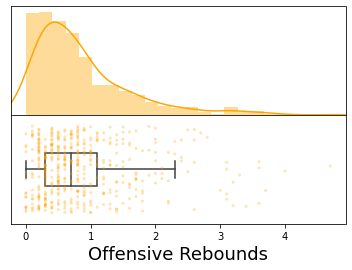

In [33]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['ORB'], 
    ax=axs[0],
    color='orange'
)
sns.stripplot(
    dfMerged['ORB'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color='orange'
)
orb = sns.boxplot(
    dfMerged['ORB'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['ORB']) * 0.05
xmin = np.min(dfMerged['ORB']) - spacer
xmax = np.max(dfMerged['ORB']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
orb.set_xlabel("Offensive Rebounds", fontsize = 18)

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Defensive Rebounds')

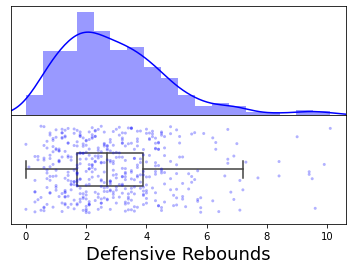

In [34]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['DRB'], 
    ax=axs[0],
    color='blue'
)
sns.stripplot(
    dfMerged['DRB'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color='blue'
)
drb = sns.boxplot(
    dfMerged['DRB'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['DRB']) * 0.05
xmin = np.min(dfMerged['DRB']) - spacer
xmax = np.max(dfMerged['DRB']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
drb.set_xlabel("Defensive Rebounds", fontsize = 18)

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Steals')

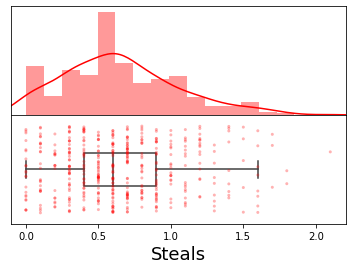

In [35]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['STL'], 
    ax=axs[0],
    color='red'
)
sns.stripplot(
    dfMerged['STL'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color='red'
)
stl = sns.boxplot(
    dfMerged['STL'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['STL']) * 0.05
xmin = np.min(dfMerged['STL']) - spacer
xmax = np.max(dfMerged['STL']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
stl.set_xlabel("Steals", fontsize = 18)

C:\Users\husto\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\husto\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(

Text(0.5, 0, 'Blocks')

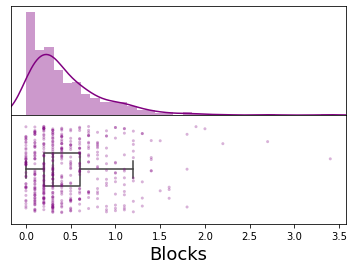

In [36]:
fig, axs = plt.subplots(nrows=2)

sns.distplot(
    dfMerged['BLK'], 
    ax=axs[0],
    color = 'purple'
)
sns.stripplot(
    dfMerged['BLK'], 
    jitter=0.4, 
    size=3,
    ax=axs[1],
    alpha=0.3,
    color = 'purple'
)
blk = sns.boxplot(
    dfMerged['BLK'],
    width=0.3, 
    ax=axs[1],
    showfliers=False,
)

# Align axes
spacer = np.max(dfMerged['BLK']) * 0.05
xmin = np.min(dfMerged['BLK']) - spacer
xmax = np.max(dfMerged['BLK']) + spacer
axs[0].set_xlim((xmin, xmax))
axs[1].set_xlim((xmin, xmax))

# Remove some axis text
axs[0].xaxis.set_visible(False)
axs[0].yaxis.set_visible(False)
axs[1].yaxis.set_visible(False)

# Put the two plots together
plt.subplots_adjust(hspace=0)

# Adjust boxplot fill to be white
axs[1].artists[0].set_facecolor('white')

# Rename Axis
blk.set_xlabel("Blocks", fontsize = 18)

Text(27.0, 0.5, 'Defensive Rebounds')

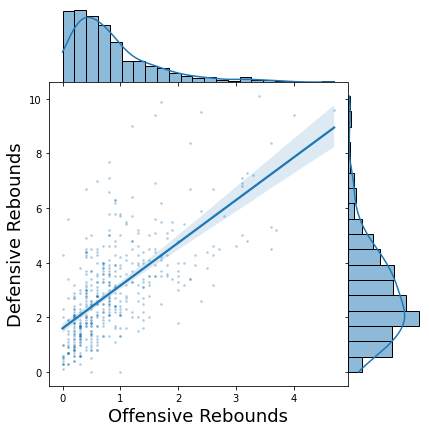

In [37]:
joint1 = sns.jointplot(
    x='ORB', 
    y='BLK', 
    data=dfMerged,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
);

joint1.ax_joint.set_xlabel('Offensive Rebounds', fontsize = 18)
joint1.ax_joint.set_ylabel('Blocks', fontsize = 18)



joint1 = sns.jointplot(
    x='BLK', 
    y='STL', 
    data=dfMerged,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
);

joint1.ax_joint.set_xlabel('Blocks', fontsize = 18)
joint1.ax_joint.set_ylabel('Steals', fontsize = 18)



joint1 = sns.jointplot(
    x='ORB', 
    y='DRB', 
    data=dfMerged,
    kind="reg",
    ratio=4,
    space=0,
    scatter_kws={
        's': 3,
        'alpha': 0.25
    },
);

joint1.ax_joint.set_xlabel('Offensive Rebounds', fontsize = 18)
joint1.ax_joint.set_ylabel('Defensive Rebounds', fontsize = 18)


In [38]:
dfMerged['OVR']=pd.to_numeric(dfMerged['OVR'])

Text(0.5, 1.0, 'OVR Vs. Blocks.')

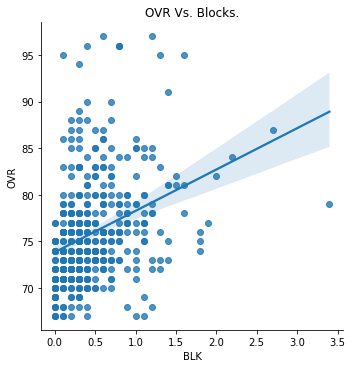

In [39]:
blockvsovr=sns.lmplot(x='BLK', y='OVR', data=dfMerged);
ax = plt.gca()

ax.set_title("OVR Vs. Blocks.")

In [40]:
stealvsovr=sns.lmplot(x='STL', y='OVR', data=dfMerged);
ax = plt.gca()

ax.set_title("OVR Vs. Steals.")

Text(0.5, 1.0, 'OVR Vs. Steals.')